In [4]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
from datetime import date

In [14]:
def get_stock_data(stock_code,stock_name,view_head=False):
    style.use('ggplot')
    start=dt.datetime(2000,1,1)
    end=dt.datetime.now()
    df=web.DataReader(stock_code,'yahoo',start,end)
    df.to_csv(stock_name+".csv")
    df = pd.read_csv(stock_name+".csv",parse_dates=True,index_col=0)
    if view_head:
        display(df.head())
    df_ohlc=df['Adj Close'].resample("10D").ohlc() #Open-High-Low-Close
    df_volume=df["Volume"].resample("10D").sum()
    df_ohlc.reset_index(inplace=True)
    df_ohlc['Date'] =df_ohlc['Date'].map(mdates.date2num)
    if view_head:
        display(df_ohlc.head())
    plt.figure(figsize=(20,20))
    ax1=plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
    ax2=plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)
    ax1.xaxis_date()
    candlestick_ohlc(ax1,df_ohlc.values,width=2,colorup='g')
    ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)
    plt.show()
    


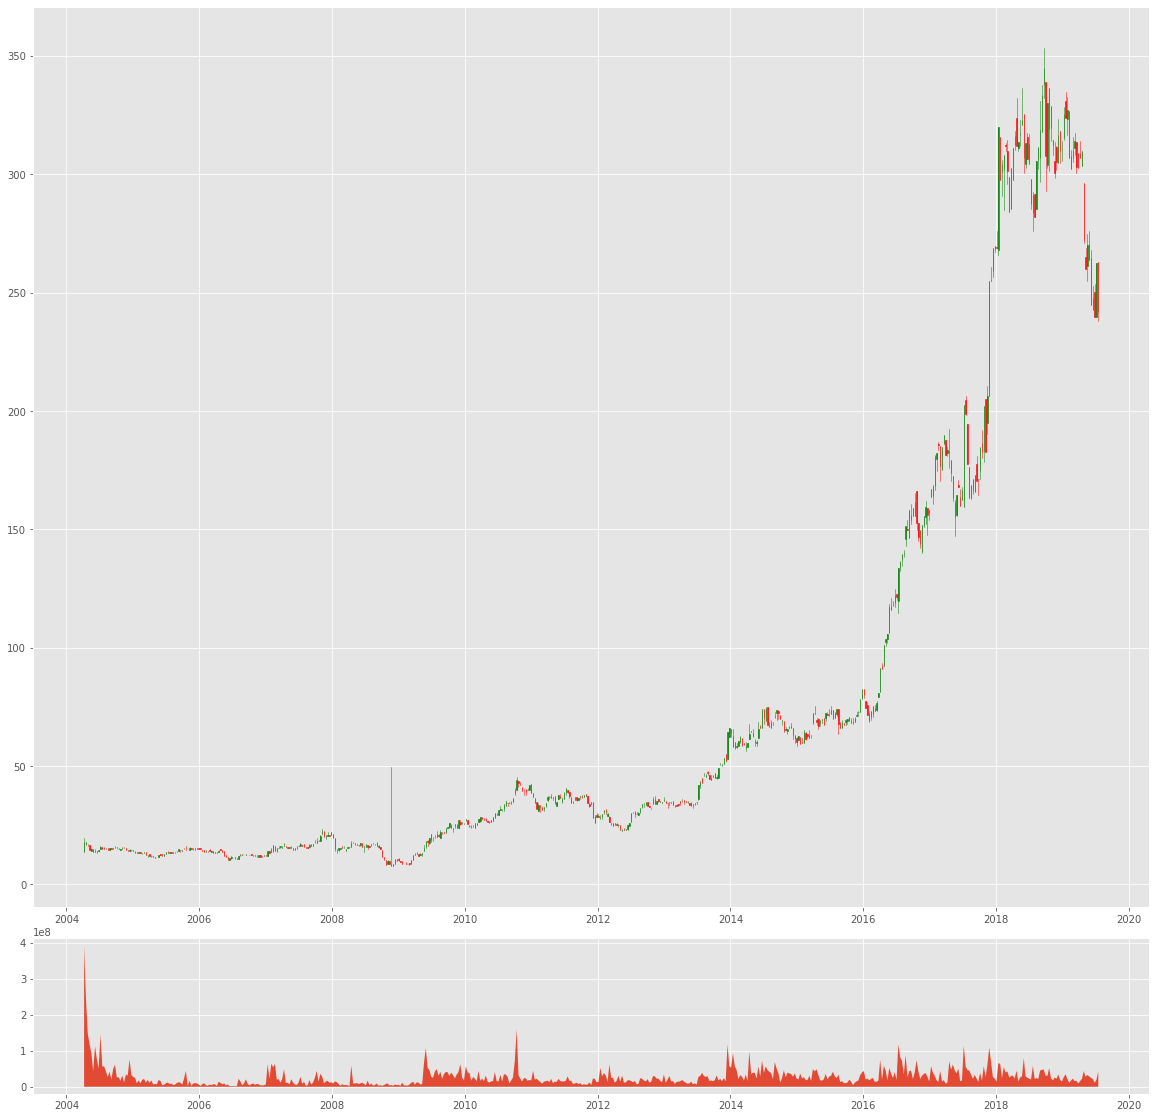

In [18]:
get_stock_data("BIOCON.NS","BIOCON")

In [8]:
import bs4 as bs
import pickle
import requests
import datetime as dt
import os
import pandas as pd
import pandas_datareader.data as web

In [9]:
def save_sp500_tickers():
    resp=requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text,"lxml")
    table=soup.find('table',{'class':'wikitable sortable'})
    tickers=[]
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[1].text
        tickers.append(ticker)
    
    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers,f)
    print(tickers)
    return tickers

#save_sp500_tickers()

In [10]:
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers =save_sp500_tickers()
    else:
        with open("sp500tickers.pickle",'rb') as f:
            tickers = pickle.load(f)
    
    if not os.path.exists("stock_dfs"):
        os.makedirs("stock_dfs")
    
    start=dt.datetime(2000,1,1)
    end=dt.datetime(2019,3,3)

    for ticker in tickers:
        print(ticker)
        if(ticker[-2:]==".B"):
            continue
        if not os.path.exists("stock_dfs/{}.csv".format(ticker)):
            df = web.DataReader(ticker,'yahoo',start,end)
            df.to_csv("stock_dfs/{}.csv".format(ticker))
        else:
            print("Already have {}".format(ticker))

In [ ]:
get_data_from_yahoo(reload_sp500=True)